In [7]:
import requests
import json
import pandas as pd
from   sklearn.feature_extraction.text import TfidfVectorizer

import csv
import pprint

In [13]:
tan_list_bunS = [] #ジャンル（文章）ごとの出現単語を登場させる。

with open('word2vec_test.csv') as f:
    temp_list_bun = []
    reader = csv.reader(f)
    for row in reader:
        temp_list_bun.append(row)
    tan_list_bunS.append(temp_list_bun)
    
#３次元のベクトル⇒２次元のベクトル（[[[,]]]⇒[[,]]）
tan_list_bunS = tan_list_bunS[0][:][:]

In [ ]:
tan_list_bunS[:3]

# doc2vec（ジャンル（文章）ごとに文章をベクトル化する。）
# word2vecにも対応！
https://qiita.com/naotaka1128/items/2c4551abfd40e43b0146#2-gensim-%E3%81%A7-doc2vec-%E3%81%AE%E3%83%A2%E3%83%87%E3%83%AB%E6%A7%8B%E7%AF%89

In [16]:
#クラスごとにラベルを構築
cls_list_bunS = []
for num, bun in enumerate(tan_list_bunS):
    cls_list_bunS.append(num)

In [17]:
#解析用データ作成ツール。
# 参考記事： http://qiita.com/okappy/items/32a7ba7eddf8203c9fa1
class LabeledListSentence(object):
    def __init__(self, words_list, labels):
        self.words_list = words_list
        self.labels = labels

    def __iter__(self):
        for i, words in enumerate(self.words_list):
            yield models.doc2vec.LabeledSentence(words, ['%s' % self.labels[i]])

In [18]:
# ライブラリ読み込み
from gensim import models

sentences = LabeledListSentence(tan_list_bunS, cls_list_bunS)
# alpha: 学習率 / min_count: X回未満しか出てこない単語は無視
# size: ベクトルの次元数 / iter: 反復回数 / workers: 並列実行数
model = models.Doc2Vec(alpha=0.25, min_count=0,
                       size=5, iter=20,works=13)

# doc2vec の学習前準備(単語リスト構築)
model.build_vocab(sentences)
model.train(sentences, total_examples = model.corpus_count, epochs = model.epochs)

companies = model.docvecs.offset2doctag

C:\Users\araik\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:570: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
C:\Users\araik\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
C:\Users\araik\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  # Remove the CWD from sys.path while we load stuff.


### doc2vecだけど、word2vecも出来る

In [ ]:
# model.most_similar(positive=[単語]) で似ている単語が出せる
model.most_similar(positive=['＊＊＊'])
#                             ↑商品コードを入れてください！

In [ ]:
#単語の足し算引き算。
model.most_similar(positive=['＊＊＊','＊＊＊'])
#                             ↑商品コードを入れてください！

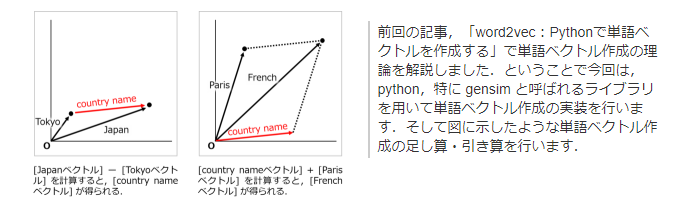